In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Carregar arquivo
df_colesterol = pd.read_csv('./datasets/dataset_colesterol.csv')

In [9]:
# Chegar arquivo
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguineo         996 non-null    object 
 1   fumante                 997 non-null    object 
 2   nivel_atividade_fisica  996 non-null    object 
 3   idade                   997 non-null    float64
 4   peso                    997 non-null    float64
 5   altura                  997 non-null    float64
 6   nivel_colesterol        1000 non-null   float64
dtypes: float64(4), object(3)
memory usage: 54.8+ KB


In [6]:
# Remover coluna ID
df_colesterol.drop(columns=['Id'], axis=1, inplace=True)

In [8]:
# Renomear colunas
df_colesterol.columns = ['grupo_sanguineo', 'fumante', 'nivel_atividade_fisica', 'idade', 'peso', 'altura', 'nivel_colesterol']

In [10]:
# Copiar DF para DF EDA
df_colesterol_eda = df_colesterol.copy()

In [11]:
# Copiar DF para DF Bucketing
df_colesterol_bucketing = df_colesterol.copy()

## EDA

In [12]:
# Visualizar os dados
df_colesterol_eda.head(10)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,A,Não,Moderado,68.0,105.0,184.0,236.98
2,O,Não,Alto,25.0,64.8,180.0,161.79
3,A,Não,Alto,43.0,120.2,167.0,336.24
4,AB,Não,Baixo,79.0,88.5,175.0,226.23
5,B,Não,Baixo,68.0,66.8,170.0,185.31
6,A,Sim,Baixo,60.0,117.3,181.0,289.33
7,O,Sim,Moderado,35.0,86.9,174.0,216.48
8,O,Não,Baixo,62.0,81.3,166.0,235.30
9,B,Sim,Alto,44.0,32.7,165.0,97.79


In [16]:
df_colesterol_eda['nivel_atividade_fisica'].unique()

array(['Baixo', 'Moderado', 'Alto', nan], dtype=object)

In [28]:
# Detectar valores ausentes
df_colesterol_eda.isna().sum()

grupo_sanguineo           0
fumante                   0
nivel_atividade_fisica    0
idade                     0
peso                      0
altura                    0
nivel_colesterol          0
dtype: int64

In [30]:
# Medidas estatísticas do DF
df_colesterol_eda.describe()

,idade,peso,altura,nivel_colesterol
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.206000,76.493700,174.890000,199.453260
std,17.450446,21.406986,8.831415,50.625152
min,20.000000,15.400000,160.000000,36.260000
25%,34.000000,61.775000,167.000000,166.345000
50%,49.000000,75.500000,175.000000,199.455000
75%,64.250000,89.975000,183.000000,233.785000
max,79.000000,158.100000,190.000000,372.670000


In [23]:
# Coletar medidas da variáveis categoricas
moda_grupo_sang = df_colesterol_eda['grupo_sanguineo'].mode()
moda_fumante = df_colesterol_eda['fumante'].mode()
moda_nivel_atividade = df_colesterol_eda['nivel_atividade_fisica'].mode()

In [22]:
# Coletar medidas da variáveis numéricas
mediana_idade = df_colesterol_eda['idade'].median()
mediana_peso = df_colesterol_eda['peso'].median()
mediana_altura = df_colesterol_eda['altura'].median()

In [27]:
# Inputar valores ausentes
df_colesterol_eda.fillna(value={'grupo_sanguineo': moda_grupo_sang[0], 
                                'fumante': moda_fumante[0], 
                                'nivel_atividade_fisica': moda_nivel_atividade[0], 
                                'idade': mediana_idade,
                                'peso': mediana_peso,
                                'altura': mediana_altura
                                }, inplace=True)

In [31]:
# Converter idade e altura para inteiro
df_colesterol_eda.idade = df_colesterol_eda.idade.astype(int)
df_colesterol_eda.altura = df_colesterol_eda.altura.astype(int)

In [40]:
# Estrutura do DF
df_colesterol_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguineo         963 non-null    object 
 1   fumante                 963 non-null    object 
 2   nivel_atividade_fisica  963 non-null    object 
 3   idade                   963 non-null    int64  
 4   peso                    963 non-null    float64
 5   altura                  963 non-null    int64  
 6   nivel_colesterol        963 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 60.2+ KB


In [33]:
# Visualizar dados
df_colesterol_eda.head(10)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33,85.1,186,199.63
1,A,Não,Moderado,68,105.0,184,236.98
2,O,Não,Alto,25,64.8,180,161.79
3,A,Não,Alto,43,120.2,167,336.24
4,AB,Não,Baixo,79,88.5,175,226.23
5,B,Não,Baixo,68,66.8,170,185.31
6,A,Sim,Baixo,60,117.3,181,289.33
7,O,Sim,Moderado,35,86.9,174,216.48
8,O,Não,Baixo,62,81.3,166,235.30
9,B,Sim,Alto,44,32.7,165,97.79


<Axes: xlabel='idade'>

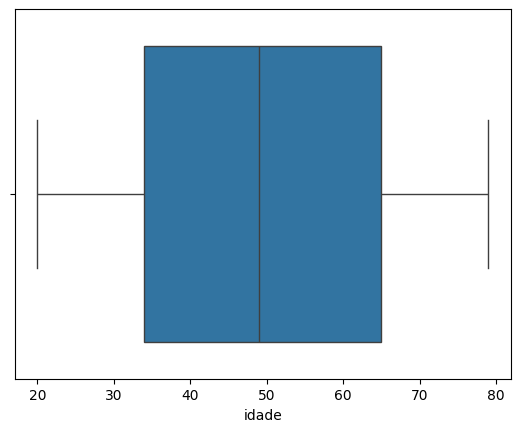

In [42]:
# Verificar / detectar outliers
sns.boxplot(data=df_colesterol_eda, x='idade')

<Axes: xlabel='peso'>

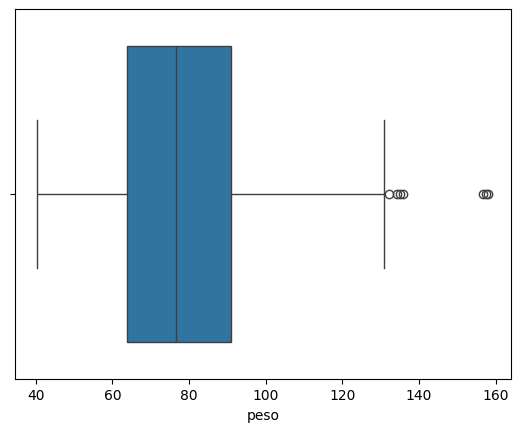

In [41]:
# Verificar / detectar outliers
sns.boxplot(data=df_colesterol_eda, x='peso')

In [37]:
# Filtrar o público a ser removido
df_colesterol_eda[df_colesterol_eda['peso'] < 40].peso.count()

np.int64(37)

In [39]:
# Remover público do DF
df_colesterol_eda.drop(df_colesterol_eda[df_colesterol_eda['peso'] < 40].index, axis=0, inplace=True)

<Axes: xlabel='grupo_sanguineo', ylabel='nivel_colesterol'>

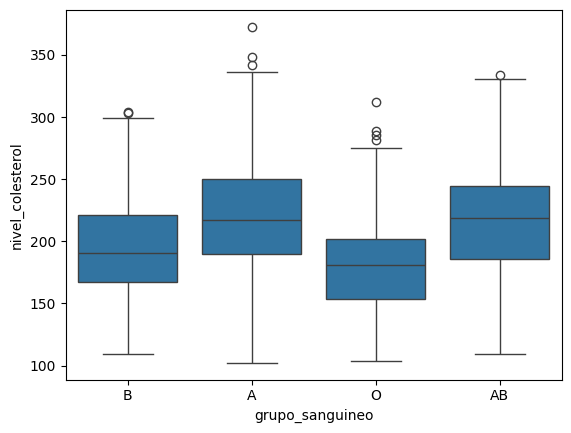

In [43]:
# Cruzamento de variáveis categoricas com nível colesterol
sns.boxplot(data=df_colesterol_eda, x='grupo_sanguineo', y='nivel_colesterol')

<Axes: xlabel='fumante', ylabel='nivel_colesterol'>

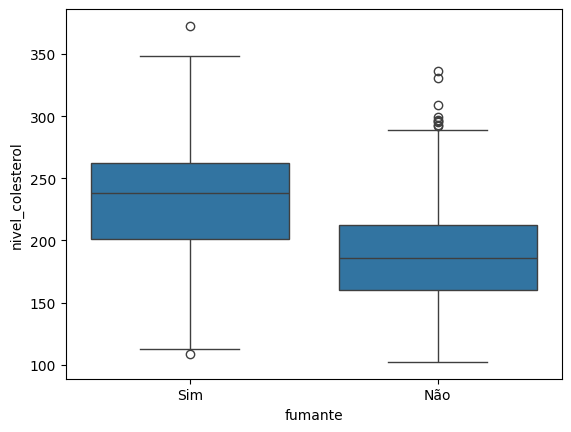

In [44]:
# Cruzamento de variáveis categoricas com nível colesterol
sns.boxplot(data=df_colesterol_eda, x='fumante', y='nivel_colesterol')

<Axes: xlabel='nivel_atividade_fisica', ylabel='nivel_colesterol'>

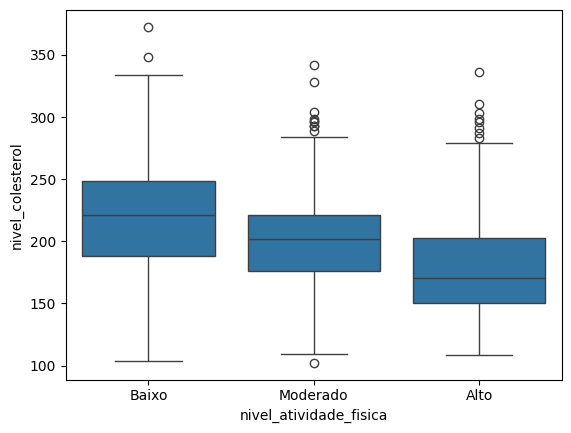

In [45]:
# Cruzamento de variáveis categoricas com nível colesterol
sns.boxplot(data=df_colesterol_eda, x='nivel_atividade_fisica', y='nivel_colesterol')